In [ ]:
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
!pip install pmdarima -U
!pip install --upgrade pmdarima==2.0.2


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.2
    Uninstalling pmdarima-2.0.2:
      Successfully uninstalled pmdarima-2.0.2
  Using cached pmdarima-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.8 MB)
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.4
    Uninstalling pmdarima-2.0.4:
      Successfully uninstalled pmdarima-2.0.4


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torchvision.utils import make_grid
import torch.nn as nn
from torchvision import transforms
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import ExponentialLR

In [ ]:
!pip install -U scikit-learn

Defining Helper Functions

To Plot randomly selected samples from a dataset.

In [ ]:
def plot_samples(dataset, size_even=6, classes=None):

    size_even = 6  # Default number of samples to plot
    dataset = train_set  # Default dataset to use (assuming 'train_set')
    fig, axs = plt.subplots(2, int(size_even // 2))  # Create subplots for the samples

    if classes is None:
        classes = tuple([n for n in range(len(dataset))])  # Default class labels

    n_samples = len(dataset)  # Total number of samples in the dataset

    # Randomly select samples
    samples = np.random.randint(0, high=n_samples - 1, size=int(size_even))

    row = 0
    col = 0
    for n, sample in enumerate(samples):
        img = dataset[sample][0]  # Get the image from the dataset
        label = "y={}".format(classes[int(dataset[sample][1])])  # Get the label for the image

        col = n

        # Determine the row and column index for the current sample
        if n > size_even / 2 - 1:
            row = 1
            col = n - int(size_even / 2)

        # Display the image and label in the corresponding subplot
        axs[row, col].imshow(make_grid(img, normalize=True).permute(1, 2, 0))
        axs[row, col].set_title(label)
        axs[row, col].axis('off')

In [ ]:
def plot_samples(dataset, size_even=6, classes=None):

    size_even = 6  # Default number of samples to plot
    dataset = train_set  # Default dataset to use (assuming 'train_set')
    fig, axs = plt.subplots(2, int(size_even // 2))  # Create subplots for the samples

    if classes is None:
        classes = tuple([n for n in range(len(dataset))])  # Default class labels

    n_samples = len(dataset)  # Total number of samples in the dataset

    # Randomly select samples
    samples = np.random.randint(0, high=n_samples - 1, size=int(size_even))

    row = 0
    col = 0
    for n, sample in enumerate(samples):
        img = dataset[sample][0]  # Get the image from the dataset
        label = "y={}".format(classes[int(dataset[sample][1])])  # Get the label for the image

        col = n

        # Determine the row and column index for the current sample
        if n > size_even / 2 - 1:
            row = 1
            col = n - int(size_even / 2)

        # Display the image and label in the corresponding subplot
        axs[row, col].imshow(make_grid(img, normalize=True).permute(1, 2, 0))
        axs[row, col].set_title(label)
        axs[row, col].axis('off')

In [ ]:
def plot_image_patchs(patchs, seq=False):

    if patchs.shape[-3] == 1:
        patchs = patchs.repeat(1, 1, 3, 1, 1)  # Add 3 channel dimension if image is grayscale

    N_patchs = patchs.shape[1]  # Number of image patches

    plot_patchs = make_grid(patchs, normalize=True).permute(0, 2, 3, 1)  # Arrange patches for plotting

    N_rows = int(np.sqrt(N_patchs))  # Number of rows for the grid plot

    # Create subplots for the image patches
    if seq:
        fig, ax = plt.subplots(1, N_rows * N_rows, sharex='col', sharey='row', figsize=(25, 5))
        fig.suptitle("Image as Sequence")
    else:
        fig, ax = plt.subplots(N_rows, N_rows, sharex='col', sharey='row')
        fig.suptitle("Image")

    i, j = 0, 0
    for n in range(N_patchs):
        if seq:
            ax[n].imshow(plot_patchs[n])
            ax[n].set_xlabel(str(n + 1))
            ax[n].axes.xaxis.set_ticklabels([])
            ax[n].axes.yaxis.set_ticklabels([])
        else:
            if n % N_rows == 0 and n != 0:
                i += 1
                j = 0

            ax[i, j].imshow(plot_patchs[n])
            ax[i, j].set_ylabel(str(n + 1))
            ax[i, j].axes.xaxis.set_ticklabels([])
            ax[i, j].axes.yaxis.set_ticklabels([])
            j += 1

    plt.show()

In [ ]:
def plot_patchs_lables(X, y, label=True, p_show=0.5):

    # Detach X from its computational graph if it's not a leaf node
    if not (X.is_leaf):
        X = X.detach()

    # Get the shape of the input tensor X
    if X.shape[0] == 49:
        sample = X.shape[1]
        patch = X.shape[0]  # Patch size or sequence length
        dim = X.shape[2]
    if X.shape[0] == 1000:
        sample = X.shape[0]
        patch = X.shape[1]
        dim = X.shape[2]

    # Reshape X and convert it to a numpy array
    X = X.reshape(sample * patch, dim).numpy()

    # Flatten the y tensor and convert it to a numpy array to label each sequence
    colors = y.repeat(patch, 1).T.flatten().numpy()

    # Perform t-SNE on the X data
    X_ = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

    # Create a scatter plot of the t-SNE transformed X data with each class labeled via color
    fig, ax = plt.subplots()
    for color in np.unique(colors):
        temp = colors == color
        ax.scatter(X_[temp, 0], X_[temp, 1], label=color)

    # If the label argument is set to True, add labels to the scatter plot
    if label:
        for i, x in enumerate(X_):
            # Label plots with a probability of p_show
            if np.random.binomial(1, p_show, 1).item() == 1:
                ax.annotate(str(i % patch), (x[0], x[1]))

    # Add a legend to the scatter plot
    ax.legend()

In [ ]:
def img_to_patch(x, patch_size, flatten_channels=True):

    B, C, H, W = x.shape
    x = x.reshape(B, C, H//patch_size, patch_size, W//patch_size, patch_size)
    x = x.permute(0, 2, 4, 1, 3, 5) # [B, H', W', C, p_H, p_W]
    x = x.flatten(1,2)              # [B, H'*W', C, p_H, p_W]
    if flatten_channels:
        x = x.flatten(2,4)          # [B, H'*W', C*p_H*p_W]
    return x

In [ ]:
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 1000

transform_mnist = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))])

train_set = torchvision.datasets.MNIST(root='.',train=True, download=True,
                                       transform=transform_mnist)

test_set = torchvision.datasets.MNIST(root='.',train=False, download=True,
                                      transform=transform_mnist)

100%|██████████| 9912422/9912422 [00:00<00:00, 29273454.27it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 18136800.99it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25293559.10it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11566805.57it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [ ]:
it=iter(test_loader)
image=next(it)[0]

In [ ]:
B, C, H, W = image.shape
print("batch size: {}, number of channels: {}, height: {},  width: {}".format( B, C, H, W ))

batch size: 1000, number of channels: 1, height: 28,  width: 28


In [ ]:
image[0][0].shape

torch.Size([28, 28])

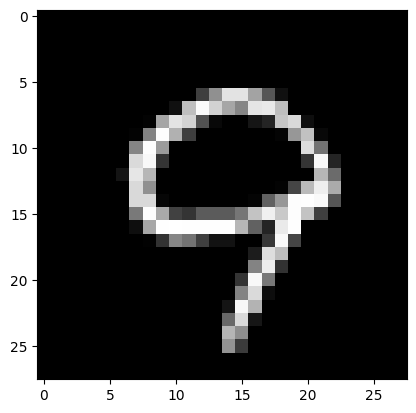

In [ ]:
plt.imshow(image[0][0].numpy(),cmap="gray")
plt.show()

In [ ]:
patch_size=4

n_patches=(H/patch_size)* (W/patch_size)
n_patches

49.0

In [ ]:
patches=img_to_patch(torch.unsqueeze(test_set[1][0],0), patch_size, flatten_channels=False)

In [ ]:
patches.shape

torch.Size([1, 49, 1, 4, 4])

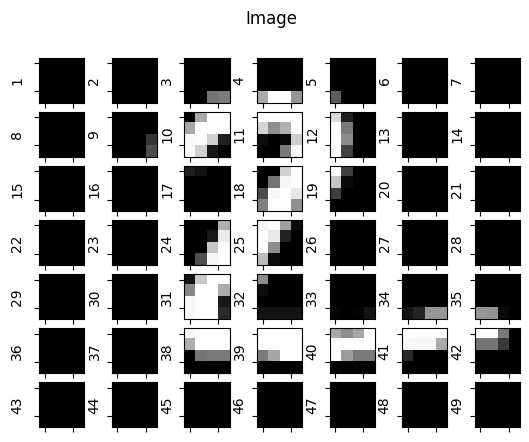

In [ ]:
plot_image_patchs(patches)

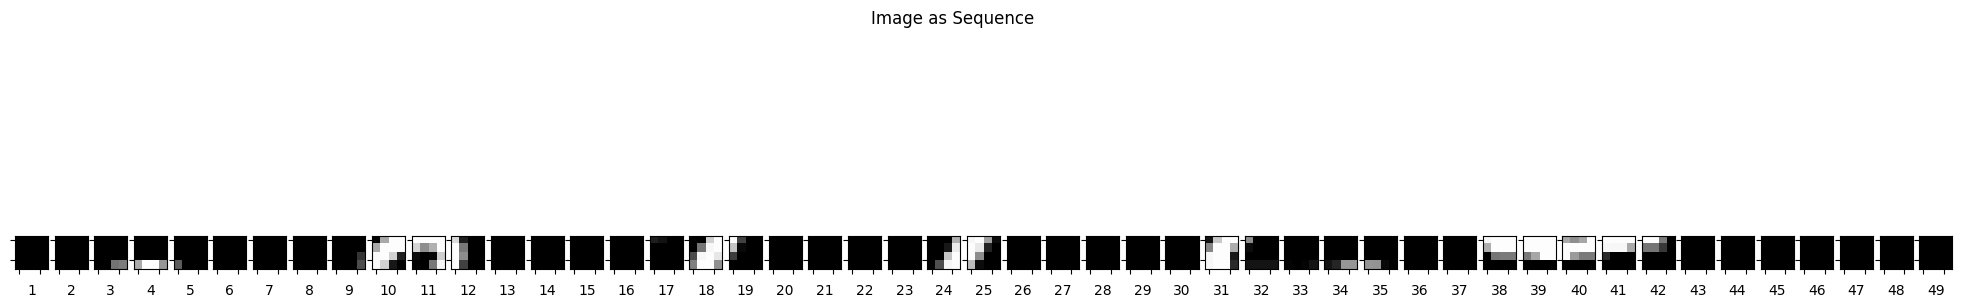

In [ ]:
plot_image_patchs(patches, seq=True)

In [ ]:
class AttentionBlock(nn.Module):

    def __init__(self, embed_dim, hidden_dim, num_heads, dropout=0.0):
        """
        Inputs:
            embed_dim - Dimensionality of input and attention feature vectors
            hidden_dim - Dimensionality of hidden layer in feed-forward network
                         (usually 2-4x larger than embed_dim)
            num_heads - Number of heads to use in the Multi-Head Attention block
            dropout - Amount of dropout to apply in the feed-forward network
            #source:https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial15/Vision_Transformer.html
        """
        super().__init__()

        self.layer_norm_1 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, num_heads,
                                          dropout=dropout)
        self.layer_norm_2 = nn.LayerNorm(embed_dim)
        self.linear = nn.Sequential(
            nn.Linear(embed_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, embed_dim),
            nn.Dropout(dropout)
        )


    def forward(self, x):
        inp_x = self.layer_norm_1(x)
        x = x + self.attn(inp_x, inp_x, inp_x)[0]
        x = x + self.linear(self.layer_norm_2(x))
        return x

In [ ]:
class VisionTransformer(nn.Module):

    def __init__(self, embed_dim, hidden_dim, num_channels, num_heads, num_layers, num_classes, patch_size, num_patches, dropout=0.0):

        super().__init__()

        self.patch_size = patch_size

        # Layers/Networks
        self.input_layer = nn.Linear(num_channels*(patch_size**2), embed_dim)
        self.transformer = nn.Sequential(*[AttentionBlock(embed_dim, hidden_dim, num_heads, dropout=dropout) for _ in range(num_layers)])
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(embed_dim),
            nn.Linear(embed_dim, num_classes)
        )
        self.dropout = nn.Dropout(dropout)

        # Parameters/Embeddings
        self.cls_token = nn.Parameter(torch.randn(1,1,embed_dim))
        self.pos_embedding = nn.Parameter(torch.randn(1,1+num_patches,embed_dim))
        print(num_patches)


    def forward(self, x):
        # Preprocess input
        x = img_to_patch(x, self.patch_size)
        B, T, _ = x.shape
        x = self.input_layer(x)

        # Add CLS token and positional encoding
        cls_token = self.cls_token.repeat(B, 1, 1)
        x = torch.cat([cls_token, x], dim=1)

        x = x + self.pos_embedding[:,:T+1]

        # Apply Transforrmer
        x = self.dropout(x)
        x = x.transpose(0, 1)
        x = self.transformer(x)

        # Perform classification prediction
        cls = x[0]
        out = self.mlp_head(cls)
        return out

In [ ]:
embed_dim= 256
hidden_dim=512
num_heads= 8
num_layers=6
patch_size=4
num_channels=1
num_patches=64
num_classes=10
dropout=0.2
model=VisionTransformer( embed_dim= embed_dim, hidden_dim=hidden_dim, num_channels=num_channels, num_heads=num_heads, num_layers=num_layers, num_classes=num_classes, patch_size=patch_size, num_patches=num_patches, dropout=dropout)

64


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
device

device(type='cpu')

In [ ]:
lr=3e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = ExponentialLR(optimizer, gamma=0.9)

In [ ]:
'''
useful_stuff = {'training_loss': [], 'validation_accuracy': []}
correct_old=0

for epoch in tqdm(range(100)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        model.train()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    scheduler.step()
    useful_stuff['training_loss'].append(running_loss)
    correct = 0
    model.eval()

    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      z = model(inputs)
      _, yhat = torch.max(z, 1)
      correct += (yhat == labels).sum().item()
      if correct>correct_old:
          correct_old=correct

    useful_stuff['validation_accuracy'].append(correct_old/len(test_set))
print('Finished Training')
'''

"\nuseful_stuff = {'training_loss': [], 'validation_accuracy': []}\ncorrect_old=0\n\nfor epoch in tqdm(range(100)):  # loop over the dataset multiple times\n\n    running_loss = 0.0\n    for i, data in enumerate(train_loader):\n        # get the inputs; data is a list of [inputs, labels]\n        inputs, labels = data[0].to(device), data[1].to(device)\n\n        # zero the parameter gradients\n        optimizer.zero_grad()\n\n        # forward + backward + optimize\n        model.train()\n        outputs = model(inputs)\n\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # print statistics\n        running_loss += loss.item()\n\n        if i % 2000 == 1999:    # print every 2000 mini-batches\n            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')\n            running_loss = 0.0\n    scheduler.step()\n    useful_stuff['training_loss'].append(running_loss)\n    correct = 0\n    model.eval()\n\n    for inputs,

In [ ]:
it=iter(test_loader)
images= next(it)

In [ ]:
number_samples = 100

# Create a random input tensor
input_tensor = images[0:number_samples][0]
input_labels = images[0:number_samples][1]

# Define a list to store the activation values
activations = []

# Define a custom activation hook function
def activation_hook(module, input, output):
    activations.append(output.detach())

In [ ]:
# Iterate over all the modules in the network
for module in model.modules():
    # Register the activation hook to the desired layers
    if isinstance(module, nn.Linear):
        module.register_forward_hook(activation_hook)

with torch.no_grad():
    output = model(input_tensor)